## California Housing Data

### ML Checklist

1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for Machine Learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution
8. Launch, monitor andmaintain the system

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Step 1: Look at the big picture

Ask the following questions
1. What is the business objective?

This is important for understanding how your model will be used, and in choosing the algorithms, framing the problem, \
tweaking performance etc

2. What does the current solution look like?

This will help you gain insight into how the problems is being solved, giving ideas and insights,\
maybe even a way to approach the problem.

#### Now we frame the problem
1. Is it supervised, unsupervised or reinforcement learning?

2. Is it classification, regression or something else?




Business objective: To estimate housing prices better
Current Solution: Manual estimation(inefficient, time-consuming and prone to errors)

#### Problem Framing
Supervised Learning problem because we have ***labeled data in the dataset***\
Regression as we are ***trying to predict the value of a continuous variable ('Housing Price')***\


More specifically, it is a ***Multiple Regression Problem*** as we are using multiple \
columns to make predictions


### Choose a Performance Measure
A typical performance error for Regression Problems is **Root Mean Squared Error**. However, in special situations(eg lots of outliers etc) you may choose to proceed with other functions such as the **Mean Absolute Error**.

Computing the root of **RMSE** corresponds to the ***Euclidean Norm***, making it sensitive to outliers. In such cases, the **MAE** is preferred. As a rule of thumb \
\
**"A normal distribution would generally imply using RMSE, as it has lesser outliers and should therefore, be preferred"**

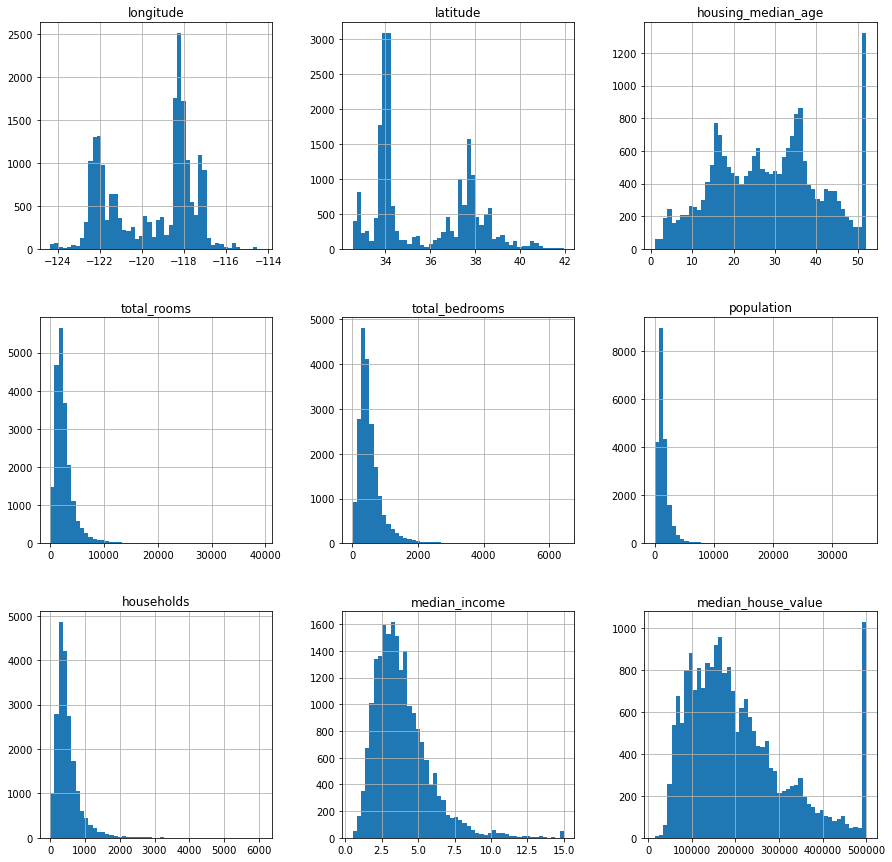

In [5]:
df.hist(bins=50,figsize=(15,15))
plt.show()

### Findings

1. We see that the **median_income** data has been scaled and capped at 15.0. Similarly, the **housing_median_age** data and the **median_house_value** have been capped too. The latter could be a problem as it is the target attribute(ie the one to predict). As ML algorithms might learn that the prices never go beyond the limit mentioned.

2. The attributes have very different scales and hence feature scaliing must be done to fix this.

3. Many histograms are ***tail heavy*** ie,they extend much farther to the right of the median than the left. THis may make it harder for some algorithms to detect patterns. These must be converted to have more bell shaped distributions

It is always better to split your dataset before hand and never look at the test set again. This is a random sampling split.

This is a purely random sampling method, which works when your dataset is large enough especially in terms of attributes. However, if that is not the case, you run the risk of introducin **sampling bias** in your test set ie, your test set may not be representative of the entire data.

population. For example, the US population is com‐ posed of 51.3% female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called **stratified sampling:** the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.


In [6]:
df.shape

(20640, 10)

In [7]:
df['income_cat']=pd.cut(df['median_income'],
                       bins=[0.,1.5,3.0,4.5,6.,np.inf],
                       labels=[1,2,3,4,5])

<AxesSubplot:>

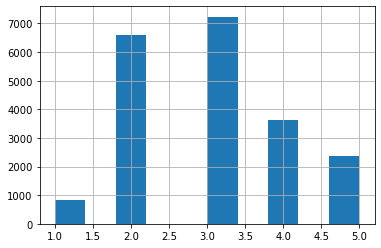

In [8]:
df['income_cat'].hist()

No handles with labels found to put in legend.


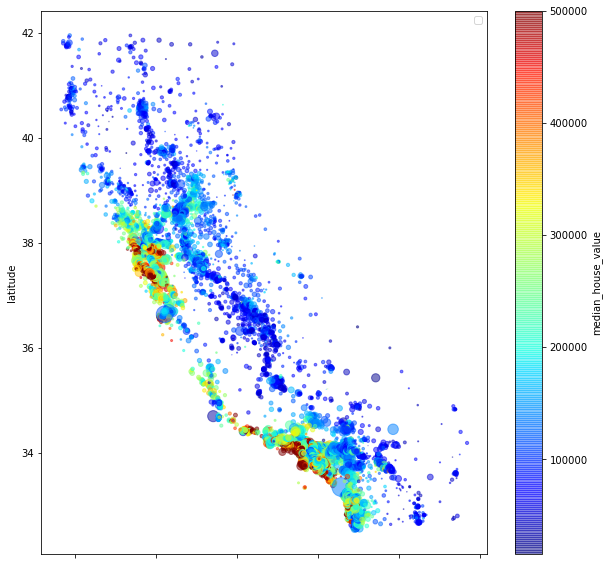

In [9]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,figsize=(10,10),
        s=df['population']/100,c="median_house_value",cmap="jet")
plt.legend()

From this plot, we can observe that the price of a house is dependent upon the location(higher priced houses are near the sea)

In [10]:
corr_matrix=df.corr()

In [11]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [12]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot

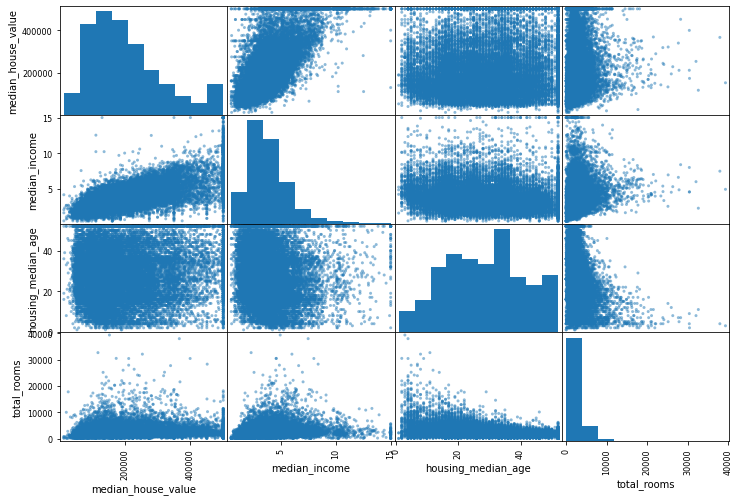

In [13]:
attributes=["median_house_value","median_income","housing_median_age","total_rooms"]
scatter_matrix(df[attributes],figsize=(12,8))

<AxesSubplot:>

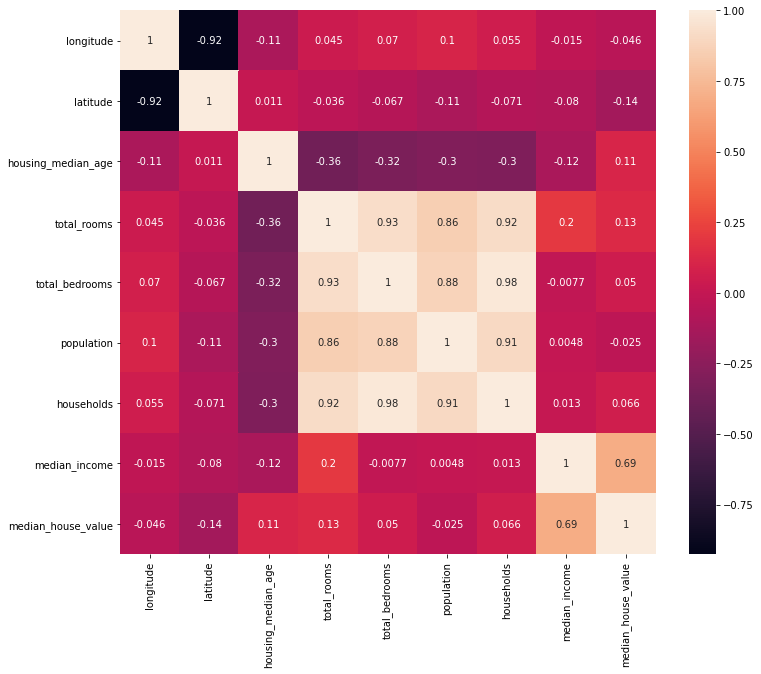

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [15]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [16]:
df['rooms_per_household']=df['total_rooms']/df['households']

In [17]:
df['bedrooms_per_household']=df['total_bedrooms']/df['households']

In [18]:
df.drop(columns=["total_rooms","total_bedrooms"],inplace=True)

In [19]:
df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,1.171920


In [20]:
df.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
income_cat                  0
rooms_per_household         0
bedrooms_per_household    207
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imputer=SimpleImputer(strategy="median")

In [23]:
df_num=df.drop(columns=["ocean_proximity"])
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  1.16600000e+03,
        4.09000000e+02,  3.53480000e+00,  1.79700000e+05,  3.00000000e+00,
        5.22912879e+00,  1.04888889e+00])

In [25]:
df_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  1.16600000e+03,
        4.09000000e+02,  3.53480000e+00,  1.79700000e+05,  5.22912879e+00,
        1.04888889e+00])

In [26]:
X=imputer.transform(df_num)

In [27]:
df=pd.DataFrame(X,columns=df_num.columns)

In [28]:
df.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
population                0
households                0
median_income             0
median_house_value        0
income_cat                0
rooms_per_household       0
bedrooms_per_household    0
dtype: int64

In [29]:
df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,1.171920


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
    df_train=df.loc[train_index]
    df_test=df.loc[test_index]